## Opis problema

Pred nama je skup podataka o pacijentima koji su podvrgnuti **elektrokonverziji** (električnoj kardioverziji). Kardioverzija je procedura koja se sprovodi s ciljem uspostavljanja **sinusnog srčanog ritma** kod pacijenata sa upornom tahikardijom – povećanom srčanom frekvencijom (brojem otkucaja srca). To je čest simptom kod **pretkomorske (atrijalne) fibrilacije** – nepravilnog rada (grčenja i opuštanja) srčanih pretkomora – ali i mnogih drugih bolesti srca, kao što su akutna srčana slabost (insuficijencija) ili problemi sa krvnim pritiskom. Sama kardioverzija, kao uspostavljanje sinusnog ritma, može se postići lekovima. Međutim, vremenom je razvijena tehnika električne kardioverzije (elektrokonverzije), koja je danas uobičajena u kardiologiji i o kojoj je ovde reč. Ovaj pristup može podstaći stvaranje krvnih ugrušaka (trombova), tako da zahteva **antikoagulantnu profilaksu** – uzimanje lekova protiv zgrušavanja pred proceduru.

Opis terapije je sledeći ([Wiki](https://sr.wikipedia.org/sr/Kardioverzija)): 'Kardioverzija električnim šokom zasniva se na upotrebi kratkotrajnog električnog šoka preko elektroda postavljenih na grudnom košu bolesnika. Jedna elektroda postavlja se na predeo vrha srca, a druga desno, na gornji deo grudne kosti (stenuma), da bi se primenom električnog šoka jednosmeme struje (DC – *direct current*) izvršila depolarizacija srčanog mišića (miokarda) i prekinula tahikardija, odnosno tahiaritmija. (...) Podrazumeva oslobađanje električnog šoka, koji je vremenski usklađen (sinhronizovan) sa električnom aktivnošću srca, prema R-zupcima u elektrokardiogramu (EKG). Ova tehnika osigurava da do električne stimulacije ne dođe tokom vulnerabilnog perioda srčanog ciklusa, koji obuhvata period od 60 do 80 msec pre, do 20 do 30 msec posle vrha T-talasa. (...) Električni šok treba da je pravilno sinhronizovan sa QRS kompleksom, što zahteva monitoring R-zupca u odgovarajućem, odabranom odvodu. Osim amplitude R-zupca, važno je da se u datom odvodu dobro vidi P-talas, što olakšava procenu ishoda procedure.'

Naš zadatak je da na osnovu dobijenih podataka o pacijentima napravimo **klasifikacioni model** koji tačno predviđa **da li će procedura biti uspešna**.

## Opis podataka

Kada su u pitanju podaci, distrubuirana Excel datoteka sadrži **202 reda** i **102 kolone**. Redovi predstavljaju pacijente i poslednja trećina je prazna, te korisnih podataka o pacijentima zapravo ima 147. Ovaj broj će i nadalje ostati nepromenjen, tj. nećemo izbacivati nijedan neprazan red iz skupa. Prva karakteristika je indeksna i predstavlja broj pacijenta u bazi, pa se zapravo može reći da imamo 101 atribut. Slede neke nesporne osobine, sa jasnim vrednostima (4):
1. **redni broj bolesnika u godini**,
2. **godine starosti pacijenta**,
3. **stariji od 65 godina** – interval zatvoren sleva, uključuje i 65-godišnjake,
4. **pol** – muški ili ženski.

Nakon ovoga sledi grupa atributa koji predstavljaju polaznu tačku za razmatranje pacijenta (*baseline*, 28):
1. **broj istorije** – broj kartona, niska oblika broj/godina,
2. **datum elektrokonverzije** – pun datum procedure,
3. **indikacija** – atrijalna fibrilacija (AF), treperenje (*flutter*) ili tahikardija,
4. **ukupno trajanje indikacije u mesecima**,
5. **trajanje tekuće epizode bolesti u mesecima**,
6. **frekvenca komora na prijemnom EKG-u** – razvrstane (*binned*) vrednosti,
7. **blok(ada) grane** – ima li problema sa sprovodnim sistemom srca i sa koje strane – LBBB, RBBB ili PM,
8. **dimenzija LPK** – dimenzija leve pretkomore srca u milimetrima,
9. **EDD LK** – end-dijastolna dimenzija leve komore u milimetrima, na kraju punjenja,
10. **ESD LK** – end-sistolna dimenzija leve komore u milimetrima, na kraju pražnjenja,
11. **EF LK** – ejekciona frakcija leve komore u procentima, udeo izbačene krvi pri kontrakciji,
12. **MR** – mitralna regurgitacija, vraćanje krvi iz leve komore u pretkomoru kroz oslabljeni zalistak
13. **TR** – trikuspidalna regurgitacija, isto kao prethodno, samo sa desne strane srca,
14. **HTA** – hipertenzija, povišen krvni pritisak,
15. **DM** – dijabetes metilus, šećerna bolest,
16. **HLP** – hiperlipoproteinemija, povišena masnoća u krvi,
17. **HOBP** – hronična opstruktivna bolest pluća, smanjen protok vazduha kroz disajne putevime,
18. **pušenje** – da li je pacijent bivši ili sadašnji pušač ili pak nepušač,
19. **hereditet za KVB** – nasledni faktor za kardiovaskularne bolesti,
20. **ishemijska bolest srca** – smanjen protok krvi srčane arterije,
21. **HF** – zatajenje srca (*heart failure*) sa očuvanom ejekcionom frakcijom ili bez nje – HFpEF ili HFrEF,
22. **NYHA klasa** – mera ozbiljnosti zatajenja srca prema Njujorškom udruženju za srce,
23. **prethodni TIA/CVI** – moždani udar ili problem sa vidom usled slabog dotoka krvi u mozak,
24. **HBI** – hronična bubrežna slabost (insuficijencija),
25. **CHADS-Vasc** – klinički skor kojim se procenjuje rizik od moždanog udara,
26. **poremećaj funkcije štitaste žlezde** – hipertireoza ili hipotireoza,
27. **dosadašnje elektrokonverzije** – da li ih je bilo i koliko tačno (razvrstano),
28. **SCD** – strukturna bolest srca – ishemijska, dilatativna, hipertrofična, valvularna, urođena, kombinovana.

Naredni skup atributa odnosi se na terapiju pre elektrokonverzije (uglavnom indikatori uzimanja, 19):
1. **beta blokatori** – umanju dejstvo hormona stresa i štite srce od nepravilnog rada,
2. **ACE inhibitori** – smanjuju krvni pritisak i ublažavaju zatajenje srca,
3. **ARB** – isto kao ACE inhibitori, samo za pacijente koji ne reaguju na prve,
4. **furosemid** – diuretik, za izbacivanje suvišne tečnosti koja se gomila zbog zatajenja srca,
5. **drugi diuretik** – upotreba diuretika koji nije furosemid, takođe za smanjenje pritiska,
6. **spironolakton** – sličnog efekta kao prethodna dva, sa kojima se često i kombinuje,
7. **Ca antagonisti** – blokatori kalcijumovog kanala, smanjuju krvni pritisak i ublažavaju bolove,
8. **amiodaron** – višestruko deluje s ciljem ublažavanja aritmije, fibrilacije, tahikardije,
9. **propafen** – još jedan poznati antiaritmik, usporava prebrze otkucaje srca,
10. **flekainid** – takođe sprečava aritmiju, jak lek sa jakim neželjenim dejstvima,
11. **sotalol** – isto kao prethodni, isto samo za najteže slučajeve zbog neželjenih dejstava,
12. **digoksin** – takođe usporava rad srca i povećava snagu srčanih kontrakcija,
13. **ASA** – aspirin, acetilsalicitna kiselina, jedan od najpoznatijih antitrombotika,
14. **OAKT** – oralna antikoagulantna terapija – direktna, varfarin, bez nje ili bez nje nakon TEE,
15. **vrednost INR** – međunarodni normalizovani odnos, brzina koagulacije – upada li u opseg \[2, 3\],
16. **Plavix ili Brilique** – antitrombotici, deluju na krvne pločice i sprečavaju stvaranje ugrušaka,
17. **statin** – najpoznatiji lek za smanjenje nivoa holesterola u krvi,
18. **implantiran CIED** – da li je ugrađen neki uređaj u srce i koji – bradyPM, ICD, CRT-P, CRT-D,
19. **vreme u mesecima od ugradnje aparata do elektrokonverzije**.

Naposletku dolazimo do podataka o samoj elektrokonverziji (2):
1. **sinhroni, bifazni DC šok** – primenjen unutrašnji, spoljašnji ili oba tipa elektrošoka,
2. **elektrokonverzija** – delimičan ili potpun uspeh ili neki od dva tipa neuspeha.

U nastavku su dodatne karakteristike o stanju pacijenta neposredno posle procedure, zatim prazne kolone rezervisane za opis stanja aparata pre i posle intervencije, podaci o terapiji posle elektrokonverzije, kao i o tome da li se nakon mesec i godinu dana održao dobar sinusni ritam. Ove informacije, međutim, vremenski slede nakon same procedure, pa ih ne uzimamo (niti bi imalo smisla uzeti ih) u razmatranje po pitanju problema predviđanja uspešnosti terapije. Zadržavamo se, dakle, na prethodno opisana 53 atributa, od kojih je poslednji ciljni, što sveukupno znači da polazimo sa tabelom dimenzija **147 × 53**.

## Učitavanje podataka

Za rad sa skupom podataka koristimo module *numpy* i *pandas*, a u nastavku koristimo i druge prikladne biblioteke.

In [1]:
import numpy as np
import pandas as pd

Učitavamo podatke iz distribuirane *Excel* datoteke. Uzimamo samo **neprazne kolone** (prazne su F, AI, BC, BD, kojima je zadatak da grupišu polja koje slede), i to one iz prvog dela, koje se odnose na uspešnost elektrokonverzije (do BF). Pritom prvu karakteristiku, koja predstavlja broj pacijenta u bazi, uzimamo za **indeksnu**. Odbacujemo **poslednjih 55 redova**, jer su suštinski prazni – sadrže samo broj u bazi (indeks), dok su preostale vrednosti nedostajuće. Zanemarujemo upozorenje biblioteke, koje je posledica unutrašnjeg formata ulazne datoteke i ne utiče na dalju obradu, te nas ni ne zanima.

In [2]:
df = pd.read_excel(
    'elektrokonverzija.xlsx',
    index_col=0,
    usecols='A:E,G:AH,AJ:BB,BE:BF',
    skipfooter=55
)
df

C:\Users\ACER\AppData\Local\Programs\Python\Python37\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Broj bolesnika u toj godini,godine starosti,stariji od 65 0 - ne 1 - da,Pol (muski -1) (zenski -2),Broj istorije,Datum elektrokonverzije,indikacija: perzistentna 1 - atrijalna fibrilacija 2 - atrijalni flutter 3 - atrijalna tahikardija,ukupno trajanje AF (kada je prvi put dijagnostikovana) u mesecima,trajanje ove epizode AF u mesecima,frekvenca komora na prijemnom EKG-u 0 - n/a (PM) 1 - <50 2 - 50-60 3 - 60-70 4 - 70-80 5 - 80-90 6 - 90-100 7 - 100-110 8 - 110-120 9 - >120,...,Digoksin (ne - 0) (da - 1),ASA (ne - 0) (da - 1),"OAKT (ne - 0) (ne, urađen TEE - 1) (da , varfarin - 2) (da, DOAC -3)",vrednost INR 2-3,Plavix ili Brilique ili … (ne - 0) (da - 1),Statin (ne - 0) (da - 1),Implantiran CIED 0 - ne 1 - bradyPM 2 - ICD 3 - CRT-P 4 - CRT-D,Vreme u mesecima od ugradnje aparata do elektrokonverzije,"sinhroni, bifazni DC šok 1 - unutrašnji 2 - spoljašnji 3 - i unutrašnji i spoljašnji","Elektrokonverzija 1 - uspešna 2 - uspešna spoljna, neuspešna unutrašnja 3 - neuspešna spoljna 4 - neuspešna i unutrašnja i spoljašnja"
Broj u bazi,,,,,,,,,,,,,,,,,,,,,
1,1,78,1,1,42/14,2014-01-21,1,5,5,0,...,0,0,2,1.0,0,0,1.0,2,2,1
2,2,61,0,1,70/14,2014-01-29,2,24,1,7,...,0,0,2,1.0,0,0,0.0,NaN,2,1
3,3,65,1,1,109/14,2014-02-10,1,4,4,0,...,0,0,2,1.0,0,0,1.0,3,2,1
4,4,64,0,1,127/14,2014-02-14,1,24god,2,7,...,0,0,2,1.0,0,0,0.0,NaN,2,1
5,5,65,1,2,185/14,2014-03-06,1,4god,3,9,...,0,0,2,1.0,0,1,0.0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,22,61,0,1,980/19,2019-10-29,2,2,2,0,...,0,0,2,1.0,0,0,1.0,2,2,1
647,23,58,0,1,989/19,2019-10-31,2,12,2,0,...,0,0,3,NaN,0,1,1.0,2,2,1
648,24,72,1,2,1000/19,2019-11-06,1,20,20,6,...,1,0,3,NaN,0,0,0.0,NaN,2,1


Kao **nerelevantne osobine** lako odbacujemo indeks, broj pacijenta u godini, kao i broj istorije, što potvrđujemo relativno **niskom korelacijom** sa ciljnim atributom. Iz nje je jasno da su u pitanju međusobno slične karakteristike (vrednost bliska jedinici), ali da nisu u vezi sa ciljnom (vrednost bliska nuli). Na sličan način rezonujemo da ni datum elektrokonverzije ne igra bitnu ulogu u predviđanju uspešnosti procedure, ali njega zasad ostavljamo i koristimo u nastavku. I bez upotrebe koeficijenta korelacije kao statističkog oruđa, bilo bi nam logično da broj kartona ili datum procedure ne bi trebalo da utiču na uspešnost.

In [3]:
indeks = df.index.to_series()

brug = df.iloc[:, 0]

brist = df.iloc[:, 4]
def brojf(br):
    brs = br.split('/')[0]
    return int(brs) if brs else 207
brist = brist.map(brojf)

datum = df.iloc[:, 5]
god = df.iloc[:, 5].map(lambda x: x.year)
mes = df.iloc[:, 5].map(lambda x: x.month)
ned = df.iloc[:, 5].map(lambda x: x.week)
dan = df.iloc[:, 5].map(lambda x: x.day)

uspeh = df.iloc[:, -1]

def corr(sx, sy, x, y):
    print(f'Korelacija {sx} i {sy}: {x.corr(y):.2f}')

corr('indeksa', 'uspeha terapije', indeks, uspeh)
corr('broja u godini', 'broja istorije', brug, brist)
corr('broja u godini', 'uspeha terapije', brug, uspeh)
corr('broja istorije', 'uspeha terapije', brist, uspeh)
corr('meseca', 'nedelje', mes, ned)
corr('godine', 'uspeha terapije', god, uspeh)
corr('meseca', 'uspeha terapije', mes, uspeh)
corr('nedelje', 'uspeha terapije', ned, uspeh)
corr('dana', 'uspeha terapije', dan, uspeh)

Korelacija indeksa i uspeha terapije: 0.07
Korelacija broja u godini i broja istorije: 0.94
Korelacija broja u godini i uspeha terapije: -0.11
Korelacija broja istorije i uspeha terapije: -0.10
Korelacija meseca i nedelje: 1.00
Korelacija godine i uspeha terapije: 0.01
Korelacija meseca i uspeha terapije: -0.10
Korelacija nedelje i uspeha terapije: -0.11
Korelacija dana i uspeha terapije: -0.09


Istovremeno **skraćujemo imena** svih kolona na prvu reč, kako bismo u nastavku imali pregledniji prikaz tabele, ali čuvamo i originalna.

In [4]:
df.drop(columns=df.columns[[0, 4]], inplace=True)

skrati = lambda x: x.split()[0]
df.index.rename(skrati(df.index.name), inplace=True)

kolone = df.columns
df.columns = df.columns.map(skrati)

df

,godine,stariji,Pol,Datum,indikacija:,ukupno,trajanje,frekvenca,Blok,dimenzija,...,Digoksin,ASA,OAKT,vrednost,Plavix,Statin,Implantiran,Vreme,"sinhroni,",Elektrokonverzija
Broj,,,,,,,,,,,,,,,,,,,,,
1,78,1,1,2014-01-21,1,5,5,0,3,42,...,0,0,2,1.0,0,0,1.0,2,2,1
2,61,0,1,2014-01-29,2,24,1,7,0,42,...,0,0,2,1.0,0,0,0.0,NaN,2,1
3,65,1,1,2014-02-10,1,4,4,0,3,47,...,0,0,2,1.0,0,0,1.0,3,2,1
4,64,0,1,2014-02-14,1,24god,2,7,0,50,...,0,0,2,1.0,0,0,0.0,NaN,2,1
5,65,1,2,2014-03-06,1,4god,3,9,0,49,...,0,0,2,1.0,0,1,0.0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,61,0,1,2019-10-29,2,2,2,0,3,36,...,0,0,2,1.0,0,0,1.0,2,2,1
647,58,0,1,2019-10-31,2,12,2,0,3,45,...,0,0,3,NaN,0,1,1.0,2,2,1
648,72,1,2,2019-11-06,1,20,20,6,0,43,...,1,0,3,NaN,0,0,0.0,NaN,2,1


## Standardizacija kolona

Ispisujemo podatke kako bismo stekli dodatnu predstavu o atributima. Suštinski gledano, svaka izabrana kolona je **celobrojnog tipa**. Ipak, zbog sadržaja datoteke, situacija je nešto drugačija u učitanom skupu. Većina stvarno jeste celobrojna (*int64*) i zadovoljni smo njima, ali postoje dve grupe specifičnih:
* **oni koji sadrže nedostajuće vrednosti** – oni su *float64*, kako bi pokrili specijalnu vrednost NaN (*not a number*, nije broj),
* **oni koji sadrže mešane tipove podataka**, čak sa različitim značenjem u zavisnosti od tipa i formata – oni su *object*, tj. *O*.

Izdvaja se i jedna karakteristika koja predstavlja datum elektrokonverzije (*M8\[ns\]*), i nju čuvamo za kasnije, iako je nebitna i biće izbačena na kraju.

In [5]:
df.dtypes.to_numpy()

array([dtype('int64'), dtype('int64'), dtype('int64'), dtype('<M8[ns]'),
       dtype('int64'), dtype('O'), dtype('O'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('float64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('float64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('float64'), dtype('int64'), dtype('int64'), dtype('float64'),
       dtype('O'), dtype('int64'), dtype('int64')], dtype=object)

Prvo rešavamo problem kolona sa **mešanim podacima**. Primećujemo da je po pravilu u pitanju vreme u mesecima. Iako je to u suštini jedan ceo broj, u ovim trima kolonama javljaju se i dodatne tekstualne vrednosti poput: 24god, jul.11, 20dana, 3mes, od2016... Treći atribut ima i veliki broj nedostajućih vrednosti, koje odgovaraju slučaju kada nema ugrađenog aparata, kao i specijalne vrednosti 'nije prva ECV'. Od svega ovog želimo da napravimo **cele brojeve**.

In [6]:
mesano = np.where(df.dtypes == 'O')[0]
print('\n'.join(kolone[mesano]))

ukupno trajanje AF (kada je prvi put dijagnostikovana) u mesecima
trajanje ove epizode AF u mesecima
Vreme u mesecima od ugradnje aparata do elektrokonverzije


Obradom svake kolone, menjamo je red po red. Pritom se vodimo sledećim skupom **pravila transformacija**:
1. Ukoliko je vrednost celobrojna, očekivano, ne menja se.
2. Ukoliko je vrednost datumskog tipa, menja se razlikom u mesecima do datuma elektrokonverzije.
3. Ukoliko je vrednost niska, obrađuje se na adekvatan način – umnogome zavisi od formata.
4. U suprotnom je nedostajuća vrednost koja se eliminiše (popunjava) imputacijom.
 
Na kraju procesa izbacujemo datum konverzije, koji nam je bio potreban samo za računanje razlike.

In [7]:
from datetime import datetime

def razlika(dat1, dat2):
    raz = dat2 - dat1
    dan = raz.days
    mes = dan // 30
    return mes

def niska(ind, val):
    if val.startswith('n'):
        return 0
    elif 'g' in val:
        ind = val.index('g')
        br = float(val[:ind])
        return int(12 * br)
    elif 'm' in val:
        ind = val.index('m')
        return int(val[:ind])
    elif 'da' in val:
        ind = val.index('d')
        br = int(val[:ind])
        return br // 30
    else:
        god = int(val[-4:])
        val = datetime(god, 1, 1)
        dat = df.loc[ind][3]
        return razlika(val, dat)

def popuni(col):
    for ind in col.index:
        val = col[ind]
        
        if isinstance(val, int):
            continue
        elif isinstance(val, datetime):
            dat = df.loc[ind][3]
            col[ind] = razlika(val, dat)
        elif isinstance(val, str):
            col[ind] = niska(ind, val)
        else: col[ind] = -1
    
    return col.astype(np.int64)

df.iloc[:, mesano] = df.iloc[:, mesano].apply(popuni)

In [8]:
df.drop(columns=df.columns[[3]], inplace=True)
df

,godine,stariji,Pol,indikacija:,ukupno,trajanje,frekvenca,Blok,dimenzija,EDD,...,Digoksin,ASA,OAKT,vrednost,Plavix,Statin,Implantiran,Vreme,"sinhroni,",Elektrokonverzija
Broj,,,,,,,,,,,,,,,,,,,,,
1,78,1,1,1,5,5,0,3,42,56,...,0,0,2,1.0,0,0,1.0,2,2,1
2,61,0,1,2,24,1,7,0,42,59,...,0,0,2,1.0,0,0,0.0,-1,2,1
3,65,1,1,1,4,4,0,3,47,55,...,0,0,2,1.0,0,0,1.0,3,2,1
4,64,0,1,1,288,2,7,0,50,50,...,0,0,2,1.0,0,0,0.0,-1,2,1
5,65,1,2,1,48,3,9,0,49,61,...,0,0,2,1.0,0,1,0.0,-1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,61,0,1,2,2,2,0,3,36,54,...,0,0,2,1.0,0,0,1.0,2,2,1
647,58,0,1,2,12,2,0,3,45,57,...,0,0,3,NaN,0,1,1.0,2,2,1
648,72,1,2,1,20,20,6,0,43,66,...,1,0,3,NaN,0,0,0.0,-1,2,1


Sada rešavamo problem kolona sa **nedostajućim podacima**. I njih želimo da **popunimo celim brojevima**. Ovde je, međutim, situacija drugačija, pošto su nedostajuće vrednosti različite prirode. Primera radi, prva i četvrta kolona sa nedostajućim vrednostima su gusti, pa im fali samo jedna, odnosno dve vrednosti. Druga ima vrednost samo ukoliko je broj u koloni koja joj prethodni nenula. Treća je retka, pa joj svaka sedma vrednost nedostaje.

In [9]:
nan = np.where(df.dtypes == 'float64')
print('\n'.join(df.columns[nan]))

ESD
NYHA
vrednost
Implantiran


Odabiramo sledeću strategiju popunjavanja prve kolone. Kako je karakteristika ESD LK viskokorelisana sa atributom EDD LK, što je i očekivano, moguće je vrednost ESD popuniti **prosekom susedstva** u EDD. Konkretno, pronalazimo vrednost kolone EDD kod pacijenta kojem ESD nedostaje. Zatim pronalazimo sve pacijente koji imaju tu istu vrednost EDD. Na kraju, računamo prosek njihove vrednosti ESD i dodeljujemo ga susednom pacijentu kome je nedostajala.

In [10]:
esd = df.loc[:, 'ESD']
edd = df.loc[:, 'EDD']
corr('ESD LK', 'EDD LK', esd, edd)

esdi = esd.index[esd.isna()]
eddv = edd.loc[esdi].values[0]
eddi = edd.index[edd == eddv]
esdv = esd.loc[eddi]

pros = round(np.mean(esdv))
df.loc[esdi, 'ESD'] = pros
df.loc[:, 'ESD'] = df.loc[:, 'ESD'].astype(np.int64)

Korelacija ESD LK i EDD LK: 0.89


Drugu i četvrtu kolonu **popunjavamo nulama**. Dakle, ako neko nema zatajenje srca (*heart failure*, HF), računamo kao da je ozbiljnost stanja nulta, iako to nije validna NYHA (*New York Heart Association*) klasa. Takođe, podrazumevamo da pacijent za koga se ne zna ima li ugrađen srčani implatabilni elektronski uređaj (*cardiac implantable electronic device*, CIED), zapravo i nema ništa ugrađeno, jer bi taj podatak najverovatnije vrlo teško mogao da promakne.

In [11]:
df.loc[:, 'NYHA'].fillna(0, inplace=True)
df.loc[:, 'NYHA'] = df.loc[:, 'NYHA'].astype(np.int64)

df.loc[:, 'Implantiran'].fillna(0, inplace=True)
df.loc[:, 'Implantiran'] = df.loc[:, 'Implantiran'].astype(np.int64)

Treću kolonu, punu nedostajućih vrednosti, a koja predstavlja indikator da li vrednost međunarodnog normalizovanog odnosa (*international normalized ratio*, INR) upada u opseg \[2, 3\], odlučujemo da **izbacimo**. U opštem slučaju, ovaj parametar, koji predstavlja brzinu zgrušavanja krvi, vrlo je značajan u terapiji atrijalne fibrilacije (AF). Međutim, on je usko povezan, te visokokorelisan, sa podatkom da li pacijent uzima antikoagulacioni lek varfarin. Tako samo dva pacijenta na varfarinu imaju vrednost INR koja ne upada u taj za njih optimalni uspeh, i to takva dva pacijenta kod kojih je elektrokonverzija bila uspešna, tako da neupadanje u opseg nije problematično. Slično važi i u obrnutom smeru, što sveukupno opravdava odluku o izbacivanju umesto popunjavanju.

In [12]:
inr = df.loc[:, 'vrednost']
varfarin = df.loc[:, 'OAKT'] == 2
corr('INR', 'varfarina', inr, varfarin)

Korelacija INR i varfarina: 0.88


In [13]:
df.drop(columns=['vrednost'], inplace=True)
df

,godine,stariji,Pol,indikacija:,ukupno,trajanje,frekvenca,Blok,dimenzija,EDD,...,Sotalol,Digoksin,ASA,OAKT,Plavix,Statin,Implantiran,Vreme,"sinhroni,",Elektrokonverzija
Broj,,,,,,,,,,,,,,,,,,,,,
1,78,1,1,1,5,5,0,3,42,56,...,0,0,0,2,0,0,1,2,2,1
2,61,0,1,2,24,1,7,0,42,59,...,0,0,0,2,0,0,0,-1,2,1
3,65,1,1,1,4,4,0,3,47,55,...,0,0,0,2,0,0,1,3,2,1
4,64,0,1,1,288,2,7,0,50,50,...,0,0,0,2,0,0,0,-1,2,1
5,65,1,2,1,48,3,9,0,49,61,...,0,0,0,2,0,1,0,-1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,61,0,1,2,2,2,0,3,36,54,...,0,0,0,2,0,0,1,2,2,1
647,58,0,1,2,12,2,0,3,45,57,...,0,0,0,3,0,1,1,2,2,1
648,72,1,2,1,20,20,6,0,43,66,...,0,1,0,3,0,0,0,-1,2,1


## Ciljna karakteristika

Na kraju, regulišemo još i pitanje **ciljnog atributa**. To je poslednja kolona, koja govori o uspešnosti elektrokonverzije. U ulaznoj datoteci, postoje čak četiri mogućnosti za ovu kolonu – potpuni uspeh (1), delimični uspeh (2), klasični neuspeh (3), dupli neuspeh (4). Za potrebe klasifikacije, svodimo ovo na samo dve **istinitosne vrednosti** (*bool*). Dva su razloga za to. Prvi potiče od činjenice da nam nije bitno da li je uspeh delimičan ili potpun, jer je to svakako uspeh. Isto važi za neuspeh. Drugi je vezan za količinu podataka, pošto skup sadrži svega dva pacijenta sa delimičnim uspehom, a tek jednog sa duplim neuspehom.

In [14]:
uspeh = df.iloc[:, -1]
uspeh = uspeh.map(lambda x: x <= 2)

df.iloc[:, -1] = uspeh
df

,godine,stariji,Pol,indikacija:,ukupno,trajanje,frekvenca,Blok,dimenzija,EDD,...,Sotalol,Digoksin,ASA,OAKT,Plavix,Statin,Implantiran,Vreme,"sinhroni,",Elektrokonverzija
Broj,,,,,,,,,,,,,,,,,,,,,
1,78,1,1,1,5,5,0,3,42,56,...,0,0,0,2,0,0,1,2,2,True
2,61,0,1,2,24,1,7,0,42,59,...,0,0,0,2,0,0,0,-1,2,True
3,65,1,1,1,4,4,0,3,47,55,...,0,0,0,2,0,0,1,3,2,True
4,64,0,1,1,288,2,7,0,50,50,...,0,0,0,2,0,0,0,-1,2,True
5,65,1,2,1,48,3,9,0,49,61,...,0,0,0,2,0,1,0,-1,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,61,0,1,2,2,2,0,3,36,54,...,0,0,0,2,0,0,1,2,2,True
647,58,0,1,2,12,2,0,3,45,57,...,0,0,0,3,0,1,1,2,2,True
648,72,1,2,1,20,20,6,0,43,66,...,0,1,0,3,0,0,0,-1,2,True


Primećujemo da je elektrokonverzija uglavnom **uspešna** – tek kod svakog devetog pacijenta ne uspe. To posebno otežava problem klasifikacije. Naime, u pitanju je **nebalansiran skup podataka**, pa bismo olako svim pacijentima mogli prognozirati uspešnu terapiju. Tim postupkom bismo dobili vrlo jednostavan klasifikator, kao i naizgled dobre vrednosti osnovnih mera uspešnosti klasifikacije, ali ćemo u nastavku izneti loše strane takvog lenjog pristupa.

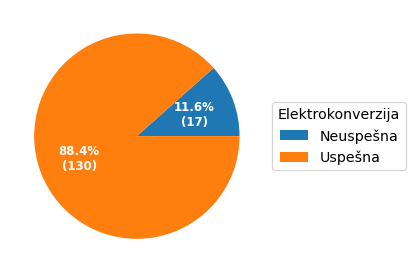

In [15]:
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 85

vrednosti, broj = np.unique(uspeh, return_counts=True)

suma = np.sum(broj)
def oznaci(proc):
    br = int(round(proc/100*suma))
    return f'{proc:.1f}%\n({br})'

kriske, tekst, autotekst = plt.pie(broj,
                                   autopct=oznaci,
                                   textprops=dict(color='w'))

plt.legend(kriske, ['Neuspešna', 'Uspešna'],
           title='Elektrokonverzija',
           loc='center left',
           bbox_to_anchor=(1, 0, 0.5, 1),
           fontsize=12,
           title_fontsize=12)

plt.setp(autotekst, size=10, weight='bold')

plt.show()

Kako vidimo, ovakav klasifikator ima visoke vrednosti dobrih osobina:
* **preciznosti** (*precision*) / **pozitivne prediktivne vrednosti** (*positive predictive value*) – $PPV = \frac{TP}{TP + FP} \approx 88 \%$,
* **odziva** (*recall*) / **osetljivosti** (*sensitivity*) / **stope pogođenih** (*hit rate*) / **stope stvarno pozitivnih** (*true positive rate*) – $TPR = \frac{TP}{TP + FN} = 100 \%$,
* **$F_1$ skora** (harmonijska sredina prethodna dva) – $F_1 = \frac{2TP}{2TP + FP + FN} \approx 94 \%$,
* **tačnosti** (*accuracy*) – $ACC = \frac{TP + TN}{TP + TN + FP + FN} \approx 88 \%$,
* pojedinih **balansiranih mera kvaliteta** – pogledati izveštaj o klasifikaciji.

Ovakav klasifikator ima i niske vrednosti sledećih loših osobina:
* **stope promašaja** (*miss rate*) / **stope lažno negativnih** (*false negative rate*) – $FNR = \frac{FN}{FN + TP} = 0 \%$,
* **stope lažnih propusta** (*false omission rate*) – $FOR = \frac{FN}{FN + TN} = 0 \%$,
* **stope lažnih otkrića** (*false positive rate*) – $FPR = \frac{FP}{FP + TP} \approx 12 \%$.

Ipak, ovakav klafisikator ima maksimalnu vrednost važne loše osobine:
* **stope lažnih alarma** (*fall-out*, *false alarm rate*) / **stope lažno pozitivnih** (*false positive rate*) – $FPR = \frac{FP}{FP + TN} = 100 \%$.

Takođe, ovakav klasifikator ima i niske vrednosti važnih dobrih osobina:
* **negativne prediktivne vrednosti** (*negative predictive value*) – $NPV = \frac{TN}{TN + FN} = 0 \%$,
* **specifičnosti** (*specificity*) / **selektivnosti** (*selectivity*) / **stope stvarno negativnih** (*true negative rate*) – $TNR = \frac{TN}{TN + FP} = 0 \%$,
* **balansirane tačnosti** (*balanced accuracy*) – $BA = \frac{TPR + TNR}{2} = 50 \%$.

Kada se sve uzme u obzir, a pogotovu balansirana tačnost, shvatamo da ovo **nije dobar pristup**.

In [16]:
from sklearn.metrics import classification_report

uvek_uspeh = np.full_like(uspeh, True)

izvestaj = classification_report(uspeh, uvek_uspeh, zero_division=True)
print(izvestaj)

              precision    recall  f1-score   support

       False       1.00      0.00      0.00        17
        True       0.88      1.00      0.94       130

    accuracy                           0.88       147
   macro avg       0.94      0.50      0.47       147
weighted avg       0.90      0.88      0.83       147



Dodatno, kako je pred nama problem **binarne klasifikacije** (dve klase), razmatramo još jednu korisnu meru kvaliteta. U pitanju je **površina ispod krive** (*area under curve*, AUC), i to poznate **ROC (*receiver operating characteristic*) krive**. Ovom krivom grafički je predstavljen kompromis između senzitivnosti i specifičnosti. Kako smo ranije primetili, lenji klasifikator je vrlo osetljiv, a nimalo specifičan, pa je kao takav izrazito loš, sa malom površinom ispod krive.

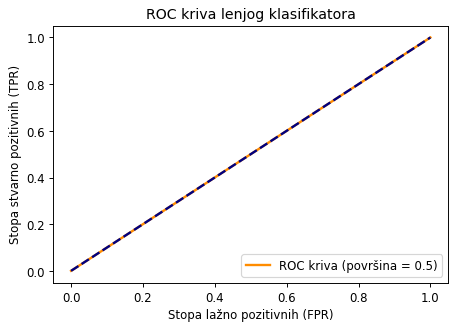

In [17]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(uspeh, uvek_uspeh)
pov = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',
         lw=2, label=f'ROC kriva (površina = {pov})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('Stopa lažno pozitivnih (FPR)')
plt.ylabel('Stopa stvarno pozitivnih (TPR)')

plt.title('ROC kriva lenjog klasifikatora')
plt.legend(loc="lower right")

plt.show()

## Značajnost atributa

Podsećanja radi, **klasifikacija** se može definisati kao problem **određivanja klase (kategorije) objekta na osnovu skupa karakteristika** koji ga opisuju. Sa te tačke gledišta, nakon prethodne standardizacije kolona, svaka ulazna karakteristika razmatranog skupa podataka je celobrojnog tipa (*int64*), dok je izlazna klasa istinitosnog tipa (*bool*). Ovakva postavka tipova, pri kojoj su svi suštinski numerički, daje nam širok dijapazon raspoloživih metoda klasifikacije.

In [18]:
df.dtypes.to_numpy()

array([dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('bool')], dtype=object)

Ipak, iako smo lepo skockali sve atribute, postavlja se pitanje da li je baš svaki **značajan prediktor** (*predictor importance*). Čest je slučaj u mašinskom učenju da instance sadrže određeni broj nerelevantnih karakteristika za određivanje vrednosti ciljne kolone. Još na početku smo iskoristili nisku korelaciju sa ciljnim atributom kao statističko oruđe da dodatno opravdano izbacivanje određenih kolona. Pokušaćemo to da uradimo još jednom, sa preostalim atributima.

In [19]:
korelacija = df.corr()
korelacija

,godine,stariji,Pol,indikacija:,ukupno,trajanje,frekvenca,Blok,dimenzija,EDD,...,Sotalol,Digoksin,ASA,OAKT,Plavix,Statin,Implantiran,Vreme,"sinhroni,",Elektrokonverzija
godine,1.000000,0.764846,0.076873,0.036974,-0.000143,-0.066937,-0.040801,0.050947,0.167367,0.056882,...,0.024475,0.002449,0.176905,-0.023180,0.004342,0.180098,0.009199,-0.118694,2.029933e-01,0.085712
stariji,0.764846,1.000000,0.207741,0.117554,0.091586,-0.139626,-0.016284,0.071096,0.094969,-0.016232,...,0.078909,-0.063960,0.042535,0.034544,-0.005599,0.157157,-0.040134,0.021535,9.349470e-02,0.123719
Pol,0.076873,0.207741,1.000000,-0.071016,0.204479,-0.091973,0.178639,-0.098564,-0.130428,-0.330181,...,0.142698,-0.001168,-0.223448,0.030361,-0.068114,0.039326,-0.208520,0.119874,4.918539e-02,0.062685
indikacija:,0.036974,0.117554,-0.071016,1.000000,-0.100798,-0.132429,-0.122262,0.207476,0.080954,0.009143,...,-0.054092,-0.140612,0.058134,-0.139305,0.051465,0.157088,0.148411,0.212232,-5.535055e-02,0.097006
ukupno,-0.000143,0.091586,0.204479,-0.100798,1.000000,-0.096419,0.274416,-0.190959,0.071459,-0.170615,...,-0.036890,-0.047911,-0.042406,-0.060238,0.029249,-0.073010,-0.127868,-0.113866,-4.934149e-02,0.083882
trajanje,-0.066937,-0.139626,-0.091973,-0.132429,-0.096419,1.000000,-0.210600,0.122840,-0.081407,0.131651,...,0.035212,0.219777,0.151284,0.059426,0.049969,-0.008371,0.085892,0.003589,3.881016e-02,-0.109659
frekvenca,-0.040801,-0.016284,0.178639,-0.122262,0.274416,-0.210600,1.000000,-0.749414,0.092610,-0.155305,...,-0.041558,0.017859,-0.071898,-0.051610,0.095048,-0.060047,-0.461000,-0.288301,1.404718e-01,0.133765
Blok,0.050947,0.071096,-0.098564,0.207476,-0.190959,0.122840,-0.749414,1.000000,0.015338,0.122573,...,-0.050659,-0.080879,0.129087,-0.079170,-0.071889,0.141153,0.431340,0.305406,-2.008030e-01,-0.144057
dimenzija,0.167367,0.094969,-0.130428,0.080954,0.071459,-0.081407,0.092610,0.015338,1.000000,0.360951,...,-0.063342,0.091522,0.322198,-0.103816,0.083705,0.238775,0.148995,0.125335,-1.617001e-01,-0.022848
EDD,0.056882,-0.016232,-0.330181,0.009143,-0.170615,0.131651,-0.155305,0.122573,0.360951,1.000000,...,0.048229,0.160080,0.182699,-0.067793,0.052292,0.170868,0.410876,-0.137977,-2.568277e-01,-0.169788


Izvlačenjem i sortiranjem svih korelacija po apsolutnoj vrednosti, možemo primetiti da postoji nekoliko atributa sa vrlo slabom vezom. Konkreno, najslabija je veza sa indikatorom uzimanja antiaritmika amiodarona. Zaista, i u grupi pacijenata koji uzimaju taj lek, i u drugoj grupi, udeo uspešnih elektrokonverzija je $\approx 88,4 \%$, kako je i sveukupno, a važi i obrnut smer, pa je sasvim opravdano zaključiti da su ove dve karakteristike apsolutno **nezavisne** jedna od druge. Ipak, zasad nećemo dirati nijedan atribut, ali ostavljamo ovo razmatranje kao uvod u proveru statističke nezavisnosti i uopšteno **probabilističke modele**.

In [20]:
koruspeh = korelacija.iloc[:, -1]
koruspeh = koruspeh.sort_values(ascending=False, key=abs)
koruspeh

Elektrokonverzija    1.000000
NYHA                -0.201872
ACE                 -0.184219
HF                  -0.182855
EDD                 -0.169788
pušenje             -0.156493
Vreme               -0.150168
ESD                 -0.148009
Blok                -0.144057
frekvenca            0.133765
Implantiran         -0.128395
Digoksin            -0.125255
stariji              0.123719
OAKT                 0.117677
EF                   0.117001
trajanje            -0.109659
Prethodni            0.107814
indikacija:          0.097006
Spironolakton       -0.095445
godine               0.085712
ukupno               0.083882
Hereditet           -0.082877
MR                  -0.081750
ARB                  0.077554
poremećaj            0.066503
HBI                  0.064253
DM                  -0.062783
Pol                  0.062685
Beta                -0.060480
Flekainid            0.052195
Ca                  -0.050898
ASA                 -0.050898
Furosemid           -0.047565
Drugi     

Dosad smo razmatrali sledeće indikatore niske značajnosti prediktora:
* **poznavanje domena** – jasno nam je bilo da npr. datum nije važan,
* **niska korelacija sa ciljnim atributom** – uvodna i poslednja diskusija,
* **veliki udeo nedostajućih vrednosti** – npr. kod vrednosti INR.

Poznati su još neki načini za otkrivanje niske značajnosti prediktora:
* **niska disperzija** – slabo pokrivanje raznovrsnosti u podacima,
* **visoka korelacija sa nekim drugim atributom** – duplirana informacija,
* **upotreba modela** – ovo očekujemo da će nam kasnije pomoći.

Razmatranjem disperzija atributa, ne primećujemo da je neka izrazito mala.

In [21]:
from sklearn.preprocessing import normalize

norm = normalize(df, axis=0)
norm = pd.DataFrame(norm, df.index, df.columns)

var = np.var(norm, axis=0)
var = var.sort_values(ascending=False)
var

Sotalol              0.006756
Plavix               0.006710
Flekainid            0.006664
Vreme                0.006418
Prethodni            0.006247
Digoksin             0.006247
HOBP                 0.006201
HBI                  0.006016
poremećaj            0.005967
Ca                   0.005923
ASA                  0.005923
NYHA                 0.005659
DM                   0.005646
Propafen             0.005646
dosadašnje           0.005554
Spironolakton        0.005507
ishemijska           0.005461
HF                   0.005434
ARB                  0.005414
Drugi                0.005229
Furosemid            0.005183
Blok                 0.004949
SCD                  0.004865
HLP                  0.004813
ukupno               0.004741
Implantiran          0.004673
Statin               0.004628
Hereditet            0.004350
trajanje             0.003304
pušenje              0.003259
stariji              0.003239
ACE                  0.002915
Amiodaron            0.002406
frekvenca 

## Čuvanje podataka

Na samom kraju pripreme, čuvamo prečišćeni skup podataka u novu datoteku. Završavamo sa tabelom dimenzija **147 × 49**.

In [22]:
df.to_csv('elektroprecisceno.csv')